## Feature Scaling 

#### Standardization 

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day24-standardization/Social_Network_Ads.csv')

In [89]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Purchased', 'User ID'], axis=1), df['Purchased'], test_size=0.1, random_state=42)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((360, 3), (40, 3), (360,), (40,))

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Transform the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled

array([[-1.0168079 ,  0.99930425, -1.0929077 ],
       [ 0.98346994, -1.32917168, -0.45206747],
       [-1.0168079 , -1.91129066, -0.53945477],
       ...,
       [ 0.98346994,  0.5142051 ,  1.82000244],
       [-1.0168079 ,  0.12612578,  0.18877276],
       [ 0.98346994, -0.55301303,  0.45093467]], shape=(360, 3))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14616\3642234342.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(X_train['Age'], X_train['EstimatedSalary'], cmap='coolwarm')


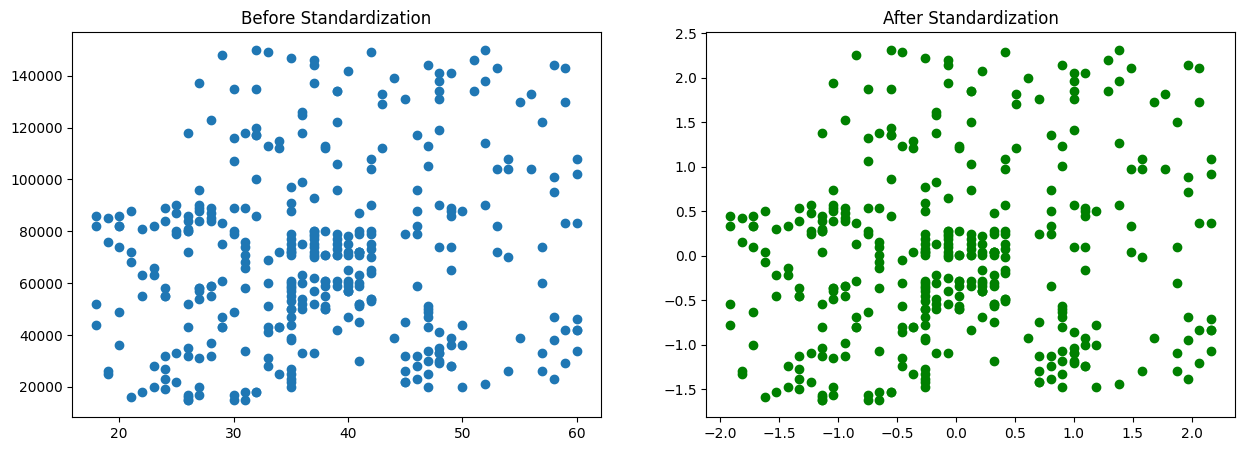

In [39]:
fig, (ax1, ax2 ) = plt.subplots(ncols=2, figsize=(15, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'], cmap='coolwarm')
ax1.set_title('Before Standardization')

ax2.scatter(X_train_scaled[:,1], X_train_scaled[:,2], color = 'green')
ax2.set_title('After Standardization')

plt.show()

### Normalization 

#### MinMax Scaling 

### $(x_i) = \frac{(x_i - x_{min})}{(x_{max} - x_{min})}$



In [47]:
from sklearn.datasets import load_wine

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)


In [49]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, wine.target, test_size=0.1, random_state=42)

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)


# Transform the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14616\2973013811.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(X_train['alcohol'], X_train['malic_acid'], cmap='coolwarm')


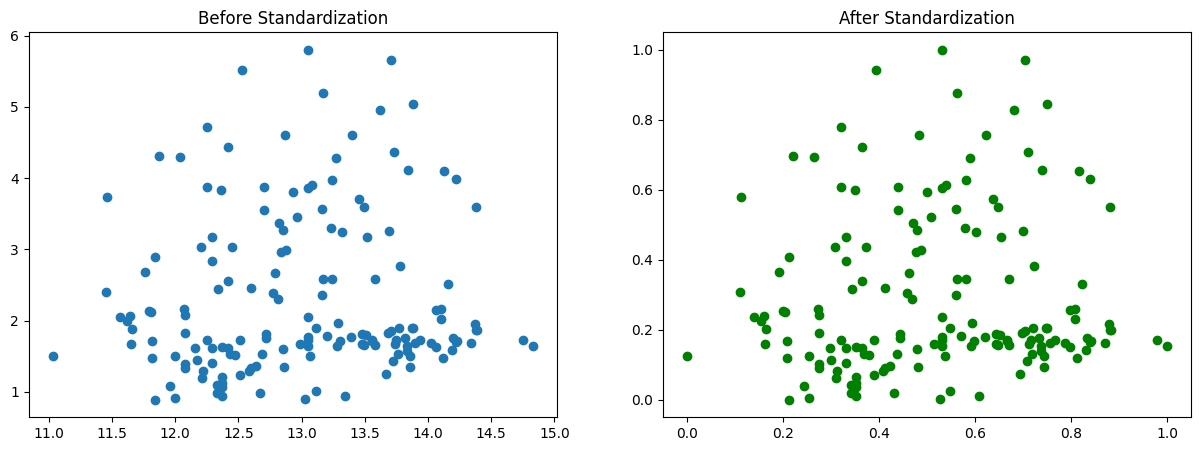

In [57]:
fig, (ax1, ax2 ) = plt.subplots(ncols=2, figsize=(15, 5))

ax1.scatter(X_train['alcohol'], X_train['malic_acid'], cmap='coolwarm')
ax1.set_title('Before Standardization')

ax2.scatter(X_train_scaled[:,0], X_train_scaled[:,1], color = 'green')
ax2.set_title('After Standardization')

plt.show()

### Mean Normalization
### (x<sub>i</sub>) = (x<sub>i</sub> - μ) / (σ)

#

### Max Absolute Scaling 
### (x<sub>i</sub>) = (x<sub>i</sub>) / (max|x|)

#

### Robust Scaling

### (x<sub>i</sub>) = (x<sub>i</sub> - Q<sub>1</sub>) / (Q<sub>3</sub> - Q<sub>1</sub>) <br>
> Robust to outliers 


## Encoding Categorical Data 

### Ordinal Encoding <br> 
Generally works on the ordinal data where one value is above than the other. <br>
Here we just assign the number values to the ordinal data so that the machine can arrange it according to its priority. <br>
Most Imp ---> 0 <br>..... so on <br>
Similarly Nominal categorical data is the data which do not have such order inside it.

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day26-ordinal-encoding/customer.csv')

In [60]:
df.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [6]:
# Extracing the review, purchased and education columns 
df = df.iloc[:, 2:]
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df.drop('purchased', axis=1), df['purchased'], test_size=0.1, random_state=42)


In [62]:
df.head()

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No


In [7]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

encoder.fit(X_train)    # We only want ordinal encoding on the training data 

X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)


### Lable Encoding 

<mark>This transformation should be used to encode target values only not the input X. <mark> 

In [ ]:
Y_train.head()

48    Yes
26     No
25     No
32    Yes
19    Yes
12     No
4      No
37    Yes
8      No
3      No
6      No
41    Yes
46     No
47    Yes
15     No
9     Yes
16    Yes
24    Yes
34     No
31    Yes
0      No
44     No
27     No
33    Yes
5     Yes
29    Yes
11    Yes
36    Yes
1      No
21     No
2      No
43     No
35    Yes
23     No
40     No
10    Yes
22    Yes
18     No
49     No
20    Yes
7     Yes
42    Yes
14    Yes
28     No
38     No
Name: purchased, dtype: object

In [66]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder.fit(Y_train)    # We only want label encoding on the output data

Y_train = encoder.transform(Y_train)
Y_test = encoder.transform(Y_test)

Y_train


array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0])

### One Hot Encoding (Nominal Categorical data)
Generally we remove the first column because it can lead to a problem called multi-colliniarity. 


In [8]:
df = pd.read_csv ('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day27-one-hot-encoding/cars.csv')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          8128 non-null   object
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   owner          8128 non-null   object
 4   selling_price  8128 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 317.6+ KB


##### One Hot encoding using pandas itself 

In [71]:
pd.get_dummies(df, columns=['fuel', 'owner']).head(2)

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,False,True,False,False,True,False,False,False,False
1,Skoda,120000,370000,False,True,False,False,False,False,True,False,False


##### Removing the first column to solve the multicollinearity 

In [ ]:
pd.get_dummies(df, columns=['fuel', 'owner'], drop_first=True).head(2)  # Removes the fuel_CNG & first_owner column

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,True,False,False,False,False,False,False
1,Skoda,120000,370000,True,False,False,False,True,False,False


##### Using Sklearn

In [74]:
df.head(2)

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df.drop('selling_price', axis=1), df['selling_price'], test_size=0.1, random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')

X_train_new = ohe.fit_transform(X_train[['fuel', 'owner']]).toarray()
X_test_new = ohe.transform(X_test[['fuel', 'owner']]).toarray()

np.hstack((X_train[['brand', 'km_driven']].values, X_train_new))

array([['Mahindra', 17000, 1.0, ..., 0.0, 0.0, 0.0],
       ['Maruti', 120000, 1.0, ..., 0.0, 0.0, 1.0],
       ['Maruti', 100000, 0.0, ..., 0.0, 0.0, 0.0],
       ...,
       ['Hyundai', 35000, 0.0, ..., 0.0, 0.0, 0.0],
       ['Maruti', 27000, 1.0, ..., 0.0, 0.0, 0.0],
       ['Maruti', 70000, 0.0, ..., 1.0, 0.0, 0.0]],
      shape=(7315, 9), dtype=object)

##### Column Transformation 

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [18]:
df = pd.read_csv ('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day28-column-transformer/covid_toy.csv')

In [14]:
df.head(2)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('has_covid', axis=1), df['has_covid'], test_size=0.2, random_state=42)

In [21]:
X_train.shape

(80, 5)

In [27]:
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ('tnf1', OneHotEncoder(drop='first'), ['city', 'gender']),
    ('tnf2', OrdinalEncoder(categories=[['Mild', 'Strong']]), ['cough']),
    ('tnf3', SimpleImputer(strategy='median'), ['fever'])
], remainder = 'passthrough')

x = transformer.fit_transform(X_train)

## Pipelines 

It is a mechanism which changes together multiple steps so that the output of each step is used as input to next step. <br>
<br>
Pipelines makes it easy to apply the same preprocessing to trail and test!

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day29-sklearn-pipelines/train.csv')

In [40]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [43]:
df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.2, random_state=42)

KeyError: "['PassengerId', 'Name', 'Ticket', 'Cabin'] not found in axis"

In [33]:
# Imputation transform 
trf1 = ColumnTransformer([
    ('impute_age', SimpleImputer(strategy='most_frequent'), [6])
], remainder='passthrough')

In [38]:
# One hot encoding
trf2 = ColumnTransformer([
    ('ohe_sex_embarked', OneHotEncoder(sparse=False, handle_unknown='ignore'), [1,6])
], remainder='passthrough')

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [34]:
# Scaling
trf3 = ColumnTransformer([
    ('scale_age', MinMaxScaler(), slice(0, 10))
])

In [35]:
# Feature Selection 
from sklearn.feature_selection import SelectKBest, chi2
trf4 = SelectKBest(score_func=chi2, k=5)

In [36]:
# Trian model 
trf5 = DecisionTreeClassifier()

In [37]:
# Crate Pipeline
pipe = Pipeline([
    ('step1', trf1),
    ('step2', trf2),
    ('step3', trf3),
    ('step4', trf4),
    ('step5', trf5)
])

NameError: name 'trf2' is not defined